#  ***Report of Legacy (Israel) Data*** : Venus

###  Importing Header and SoilPrep

In [1]:
import import_ipynb
from PlotFunctions import * 

importing Jupyter notebook from PlotFunctions.ipynb
importing Jupyter notebook from Header.ipynb
importing Jupyter notebook from SoilPrep.ipynb
importing Jupyter notebook from LoadDataMetaData.ipynb


In [3]:
import import_ipynb
from HyperMainVenus import * 

###  Spectral Preprocessing :

1. Smoothing of Spectra:  
   
    The spectras are smoothed using the 2nd order savitzky golay smoothing filter applied at the window length of 51.
 

2. Removal of Outliers from the Attributes :
    
   All the attributes which are lying at more than (+-) 3 $sigma$  (standard deviation ) distance are replaced by the     respective mean of the corresponding attributes.  
   

3. The following spectral preprocessing options are considered on the smoothed spectras :
   - Continuum Removal
   - Log on reflectance inverse
   - None of the above
    

### Resampling on 11 wavebands provided by Venus


 -   The center band '638' is provided in the data twice so while resampling we take this centre band '638' just once, thus resulting in 11 bands all together. Then the above mentioned three different spectras are resampled to the 11 wavebands provided by Venus. These spectras are resampled using the center band values and bandwidth values. 
 
 
 - For the resampled spectra corresponding to no preprocessing (i.e. for the last case ) we also consider first order derivative of the resampled spectra. Thus finally resulting in the following four categories:

1. *sampled_cr11* :  resampled continuum removal spectra (corresponding to case 1 above) to '11' bands .
2. *sampled_log11* : resampled log spectra (corresponding to case 2 above)  to '11' bands .
3. *sampled_spec11* : resampled smoothed spectra (corresponding to case 3 above) to '11' bands .
4. *fod_sampled11* : first order derivative of the smoothed spectra resampled to '11' bands.

##### The figure drawn below shows all the different spectras resampled  to 11 bands.

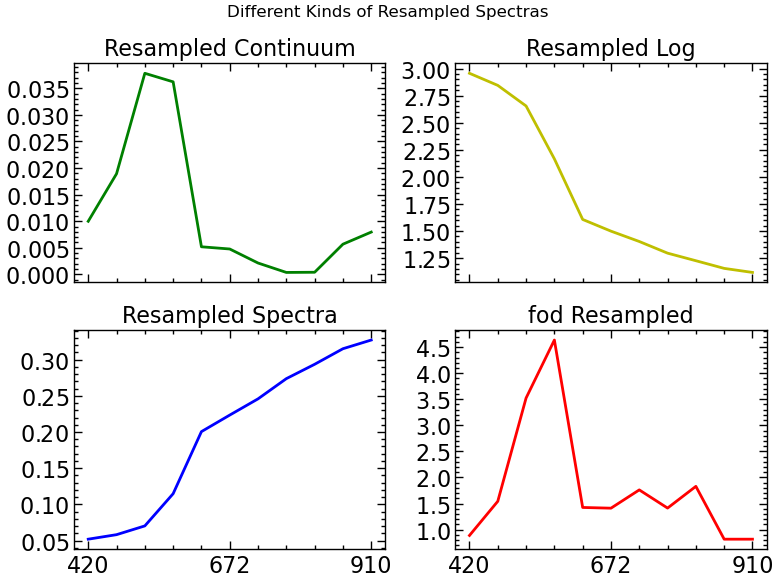

In [4]:
data1 = {'Continuum': sampled_cr11.iloc[0,:].T, 'Log': sampled_log11.iloc[0,:].T, \
        'None': sampled_spec11.iloc[0,:].T,  'fod': 100*fod_sampled11.iloc[21,:].T}
df1plot = pd.DataFrame(data1)

#define list of subplot titles
title_list = ['Resampled Continuum', 'Resampled Log', 'Resampled Spectra', 'fod Resampled']

df1plot.plot(kind='line', subplots=True, title=title_list, grid=False,
        layout=(2, 2), sharex=True, sharey=False, 
        style=['g', 'y', 'b', 'r'],)

for ax in plt.gcf().axes:
    ax.get_legend().remove()
    
# Defining Parameters
params = {
    'axes.titlesize': 10,
    'axes.labelsize': 4,
    'xtick.labelsize' : 6,
    'ytick.labelsize' : 6
}

# Updating the rcParams in Matplotlib
plt.rcParams.update(params)
plt.suptitle("Different Kinds of Resampled Spectras ", fontsize = 12)
plt.tight_layout()
plt.show()

### Correlation between Spectras and Targets

Correlation of different spectras (which were resampled on the above mentioned bands) were calculated with respect to each of the attributes. <br> See following figure for plots of correlation (of smoothed spectra) with sand, silt, clay, TOC and CaCO3.  

In [5]:
r_val0, p_val0 = find_rpval (sampled_spec11,T[0])
r_val1, p_val1 = find_rpval (sampled_spec11,T[1])
r_val2, p_val2 = find_rpval (sampled_spec11,T[2])
r_val3, p_val3 = find_rpval (sampled_spec11,T[3])
r_val4, p_val4 = find_rpval (sampled_spec11,T[4])

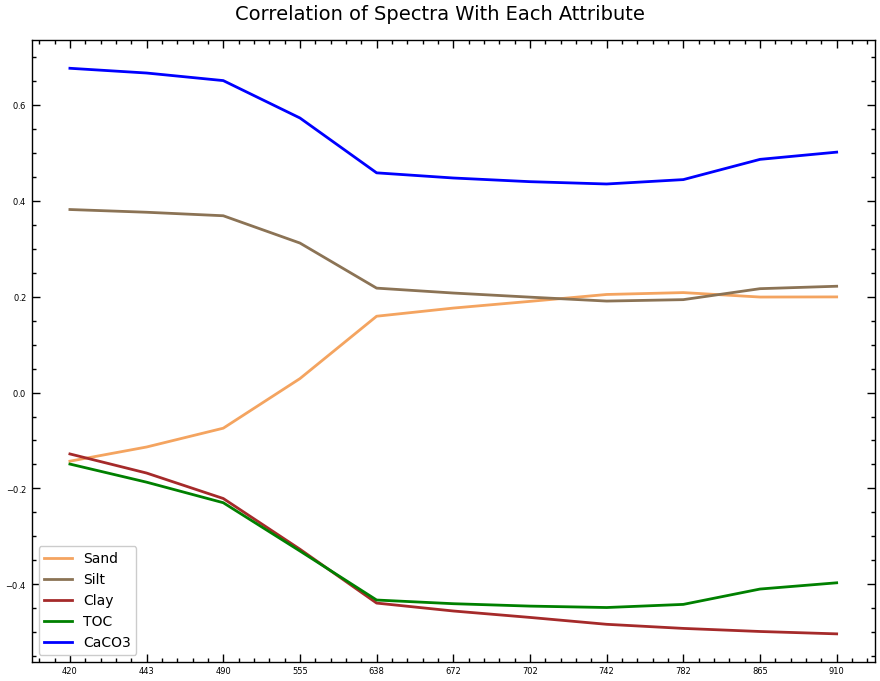

In [6]:
#create data
df = pd.DataFrame({'sand': r_val0.iloc[0,:], 'silt': r_val1.iloc[0,:],'clay': r_val2.iloc[0,:], \
                   'TOC': r_val3.iloc[0,:], 'CaCO3': r_val4.iloc[0,:]})

plt.figure(figsize=(9,7))
ax = plt.subplot(1, 1, 1)
plt.suptitle("Correlation of Spectra With Each Attribute", fontsize = 14)

# #add lines to plot
plt.plot(df['sand'], label = 'Sand', color = '#F4A460')
plt.plot(df['silt'], label = 'Silt', color = '#8B7355')
plt.plot(df['clay'], label = 'Clay', color = '#A52A2A')
plt.plot(df['TOC'], label = 'TOC', color = 'green')
plt.plot(df['CaCO3'], label = 'CaCO3', color = 'blue')

#place legend in center right of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

params = {
    
    'xtick.labelsize' : 10,
    'ytick.labelsize' : 10,
}

# Updating the rcParams in Matplotlib
plt.rcParams.update(params)
xticks = ax.get_xticks()
ax.set_xticks(xticks[0:100:1])

plt.legend(fontsize = 10)
plt. grid(False)
#plt.xticks(color='white')
plt.tight_layout()
plt.show()

### Obtaining Hypertuned Models for Each  Preprocessed Spectra

- For each preprocessed spectra a hypertuned model was obtained using HMTreeVen method.
- Calibration of models (i.e. finding hypertuned initial models) was performed using leave one out method.
- The model accuracy (of each hypertuned model) was evaluated using leave one out method. 
- Methods used are 1. PLSR as '**plsr**', 2. KernelRidgeRegression as '**ridge**', 3. SVR  as '**svr**', 4. Cubist  as '**cubist**', and 5. GBRT as '**gbrt**'.


 #  Best Models for Sand, Silt, Clay, TOC, and CaCO3..

Best models identified for each target (corresponding to different methods) are described below.

In [7]:
with open ('HMtreeVen.pickle', 'rb') as file:
    HMtreeVen = pickle.load(file)
feature_scores = {}
model_details ={} 

##  Sand Models

### Gradient Boosting Regression Tree (sand)

#### Leave one out

Sand -> [ r2 - **0.35**, Spec - fod2, n_bands -11]     <br/><br/>
***Description***: To obtain the best model for sand using gradient boosting regression tree method we trained the model on the first order derivative of the smoothed spectra which is  resampled to the 11 wavebands provided by Venus.

In [17]:
sand_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 30, random_state = 42) 
sand_model_gbrt.fit(fod_sampled11,  T[0])

GradientBoostingRegressor(n_estimators=30, random_state=42)

In [18]:
feature_scores['Sand'] = permutation_importance(sand_model_gbrt, fod_sampled11, T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'gbrt', 'spec': fod_sampled11, 'spec_proc': 'fod2', 'n_bands': 11}

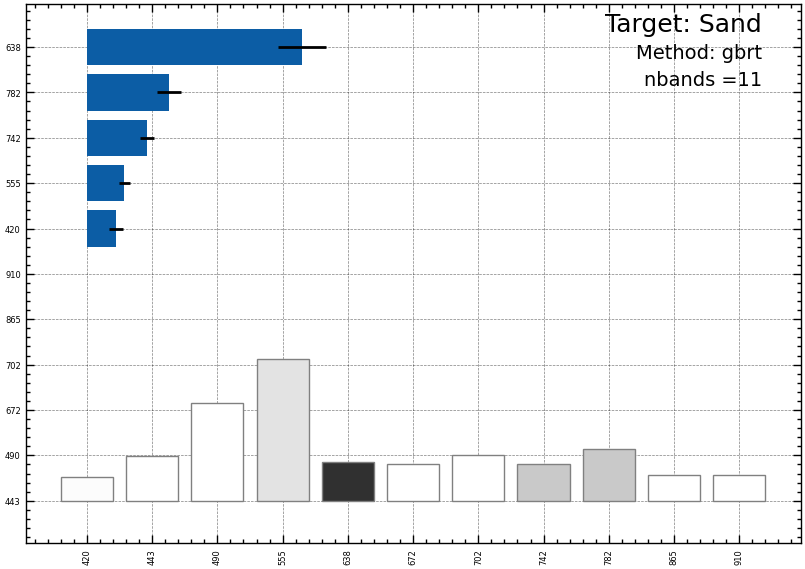

In [22]:
show_important_features_for ('Sand', model_details, feature_scores, 6, 50, 20)

### Kernel Ridge (sand)

#### Leave one out

Sand -> [ r2 - **0.35**, Spec - log, n_bands - 11]   <br/><br/>
***Description***:To obtain the best model for sand using kernel ridge regression  method we trained the model on the
 logarithmic of the reflectance inverse of the spectra which is resampled to the 11 wavebands provided by Venus.


In [9]:
sand_model_ridge = KernelRidge( alpha = 0.1)  
sand_model_ridge.fit(sampled_log11,  T[0])

KernelRidge(alpha=0.1)

In [10]:
feature_scores['Sand'] = permutation_importance(sand_model_ridge, sampled_log11, T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'ridge', 'spec': sampled_log11, 'spec_proc': 'log', 'n_bands': 11}

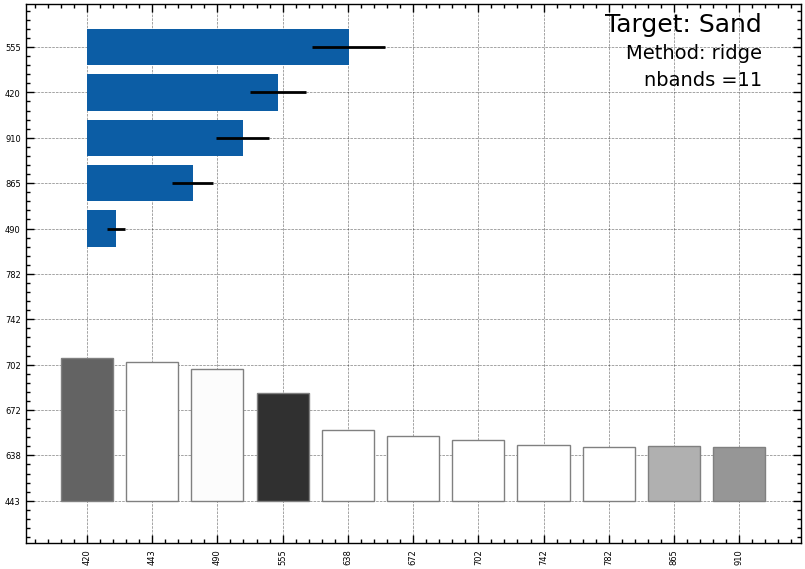

In [15]:
show_important_features_for ('Sand', model_details, feature_scores, 2, 1, 2)

### PLSR (sand)

#### Leave one out

Sand -> [ r2 - **0.33**, Spec - log, n_bands -11]     <br/><br/>
***Description***: To obtain the best model for sand using plsr method we trained the model on the logarithmic of the reflectance inverse of the spectra which is  resampled to the 11 wavebands provided by Venus.

In [24]:
sand_model_plsr = PLSRegression(n_components=3, scale=True)
sand_model_plsr.fit(sampled_log11,  T[0])

PLSRegression(n_components=3)

In [25]:
feature_scores['Sand'] = permutation_importance(sand_model_plsr, sampled_log11, T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'plsr', 'spec': sampled_log11, 'spec_proc': 'log', 'n_bands': 11}

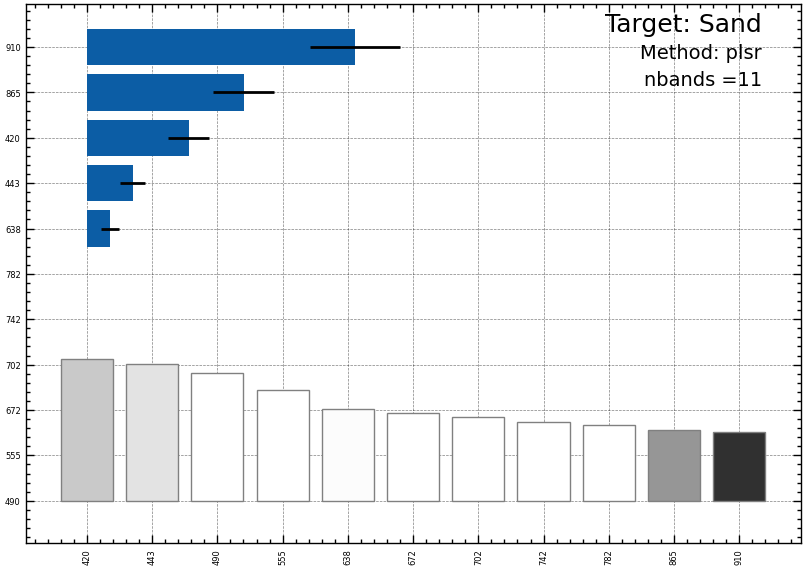

In [32]:
show_important_features_for ('Sand', model_details, feature_scores, 3, 1.5, 20)

##  Silt 

### Gradient Boosting Regression Tree (silt)

#### Leave one out

Silt -> [ r2 - **0.34**, Spec - fod2, n_bands - 11]   <br/><br/>
***Description***:To obtain the best model for silt using gradient boosting regression tree method we trained the model on the first order derivative of the smoothed spectra which is resampled to the 11 wavebands provided by Venus.


In [34]:
silt_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 30, random_state = 42) 
silt_model_gbrt.fit(fod_sampled11,  T[1])

GradientBoostingRegressor(n_estimators=30, random_state=42)

In [35]:
feature_scores['Silt'] = permutation_importance(silt_model_gbrt, fod_sampled11, T[1], n_repeats=20, random_state=0)
model_details['Silt'] = {'method': 'gbrt', 'spec': fod_sampled11, 'spec_proc': 'fod2', 'n_bands': 11}

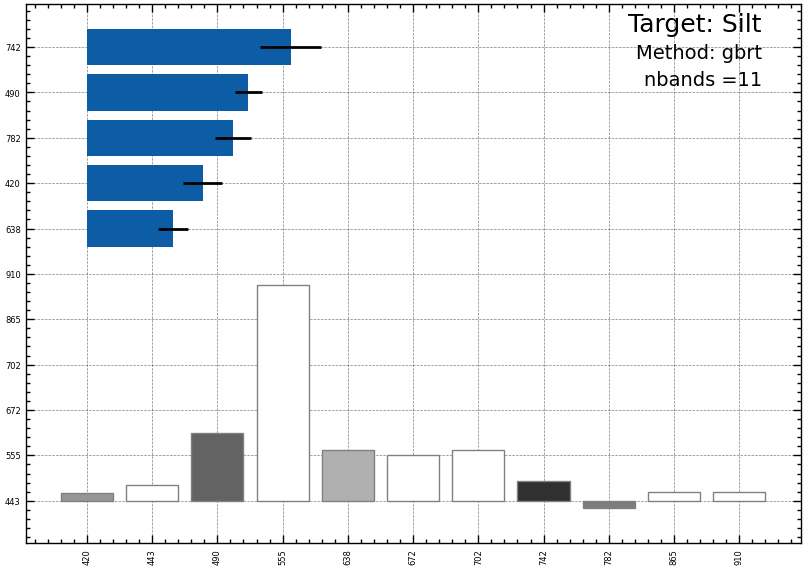

In [37]:
show_important_features_for ('Silt', model_details, feature_scores, 10, 40, 2)

### SVR (silt)

#### Leave one out

Silt -> [ r2 - **0.22**, Spec - log, n_bands - 11]   <br/><br/> 
***Description***:To obtain the best model for silt using svr method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to the 11 wavebands provided by Venus.

In [39]:
silt_model_svr = SVR(C = 10 , kernel = 'rbf', gamma = 1 ) 
silt_model_svr.fit(sampled_log11,  T[1])

SVR(C=10, gamma=1)

In [40]:
feature_scores['Silt'] = permutation_importance(silt_model_svr, sampled_log11, T[1], n_repeats=20, random_state=0)
model_details['Silt'] = {'method': 'svr', 'spec': sampled_log11, 'spec_proc': 'log', 'n_bands': 11
                        }

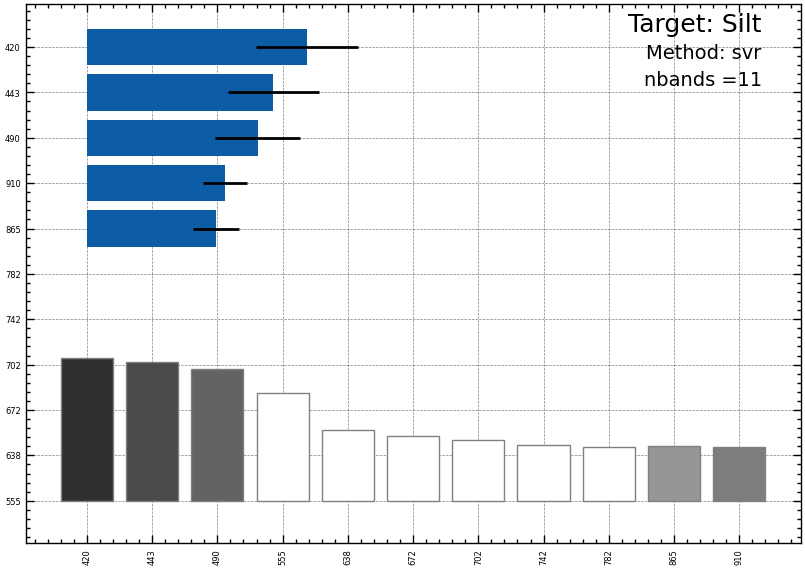

In [47]:
show_important_features_for ('Silt', model_details, feature_scores, 15, 1, 2)

### Cubist (silt)

#### Leave one out

Silt -> [ r2 - **0.2**, Spec - log, n_bands - 11]   <br/><br/>
***Description***:To obtain the best model for silt using cubist method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to the 11 wavebands provided by Venus.


In [49]:
silt_model_cubist = Cubist( n_committees = 10, n_rules = 10)  
silt_model_cubist.fit(sampled_log11,  T[1])

Cubist(n_committees=10, n_rules=10)

In [50]:
feature_scores['Silt'] = permutation_importance(silt_model_cubist, sampled_log11, T[1], n_repeats=20, random_state=0)
model_details['Silt'] = {'method': 'cubist', 'spec': sampled_log11, 'spec_proc': 'log', 'n_bands': 11}

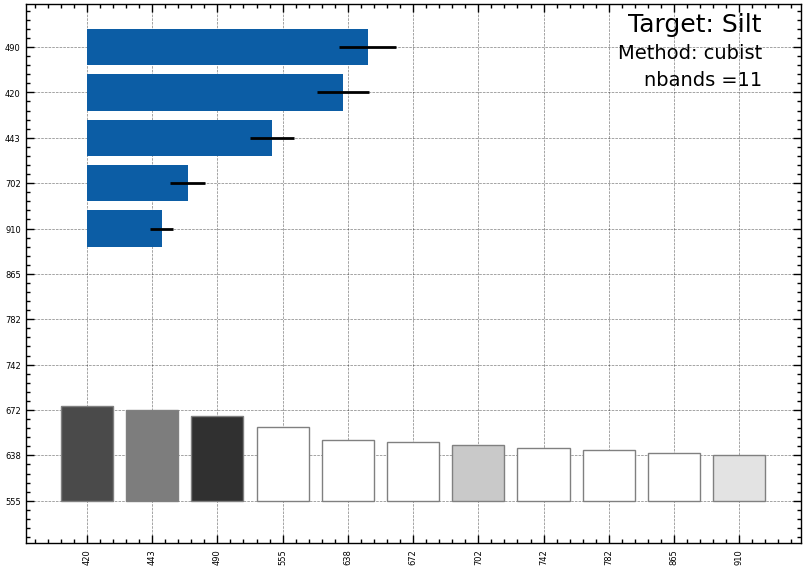

In [52]:
show_important_features_for ('Silt', model_details, feature_scores, 2, 1, 20)

## Clay 

### PLSR (clay)

#### Leave one out

Clay -> [ r2 - **0.49**, Spec - log, n_bands - 11]   <br/><br/>
***Description***:To obtain the best model for clay using plsr method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to the 11 wavebands provided by Venus.


In [54]:
clay_model_plsr = PLSRegression(n_components=4, scale=True)  
clay_model_plsr.fit(sampled_log11,  T[2])

PLSRegression(n_components=4)

In [55]:
feature_scores['Clay'] = permutation_importance(clay_model_plsr, sampled_log11, T[2], n_repeats=20, random_state=0)
model_details['Clay'] = {'method': 'plsr', 'spec': sampled_log11, 'spec_proc': 'log', 'n_bands': 11
                        }

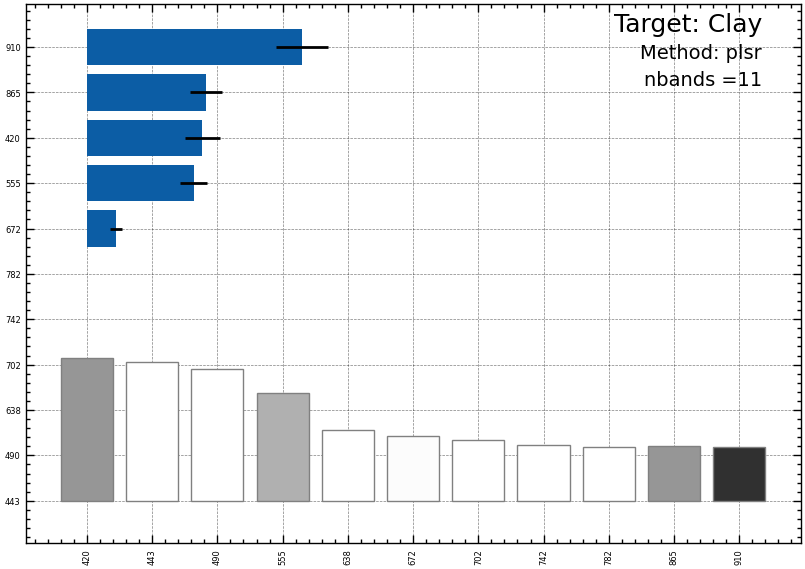

In [57]:
show_important_features_for ('Clay', model_details, feature_scores, 1, 1, 2)

### Cubist (clay)

#### Leave one out

Clay -> [ r2 - **0.43**, Spec - fod2, n_bands - 11]   <br/><br/>
***Description***:To obtain the best model for clay using cubist method we trained the model on the first order derivative of the smoothed spectra which is resampled to the 11 wavebands provided by Venus.


In [59]:
clay_model_cubist = Cubist(n_committees = 10, n_rules = 10)
clay_model_cubist.fit(fod_sampled11,  T[2])

Cubist(n_committees=10, n_rules=10)

In [60]:
feature_scores['Clay'] = permutation_importance(clay_model_cubist, fod_sampled11, T[2], n_repeats=5, random_state=0)
model_details['Clay'] = {'method': 'cubist', 'spec': fod_sampled11, 'spec_proc': 'fod2', 'n_bands': 11}

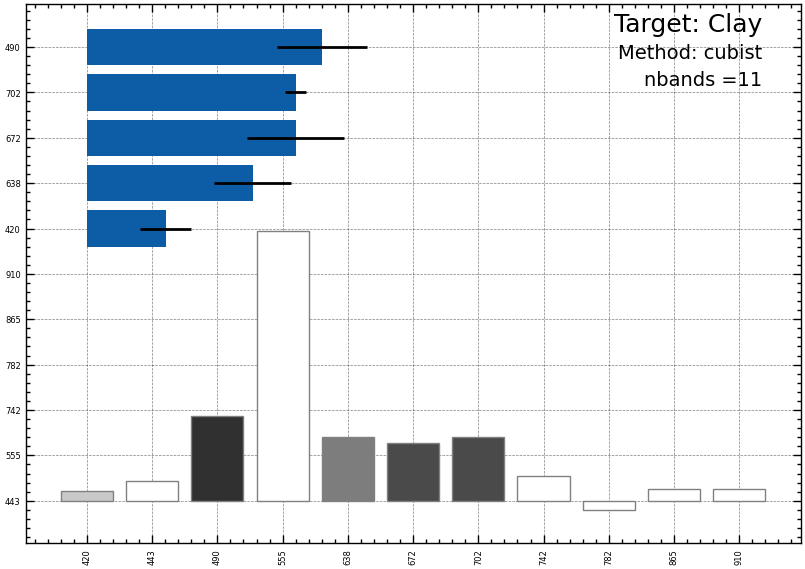

In [64]:
show_important_features_for ('Clay', model_details, feature_scores, 5, 50, 2)

### SVR (clay)

#### Leave one out

Clay -> [ r2 - **0.42**, Spec - log, n_bands - 11]   <br/><br/>
***Description***:To obtain the best model for clay using svr method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to the 11 wavebands provided by Venus.


In [66]:
clay_model_svr = SVR(C = 10 , kernel = 'linear', gamma = 0.01 )
clay_model_svr.fit(sampled_log11,  T[2])

SVR(C=10, gamma=0.01, kernel='linear')

In [67]:
feature_scores['Clay'] = permutation_importance(clay_model_svr, sampled_log11, T[2], n_repeats=20, random_state=0)
model_details['Clay'] = {'method': 'svr', 'spec': sampled_log11, 'spec_proc': 'log', 'n_bands': 11}

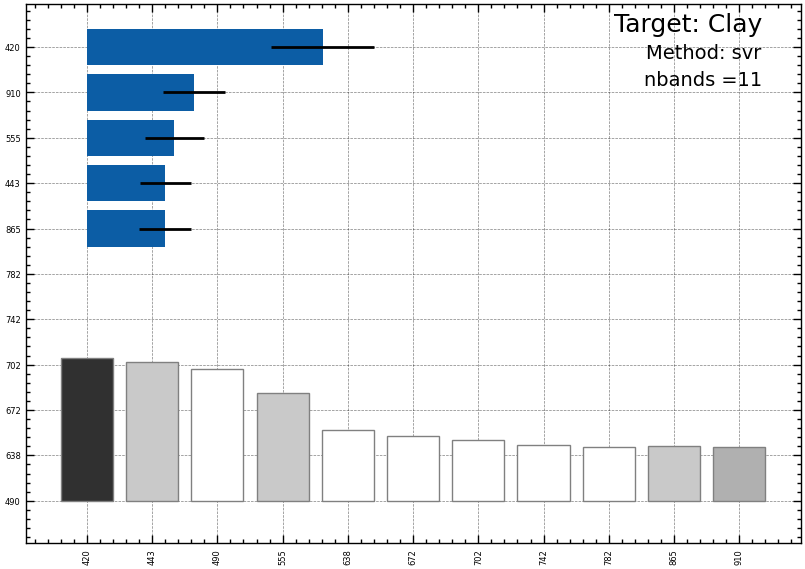

In [71]:
show_important_features_for ('Clay', model_details, feature_scores, 8, 1, 2)

## Total Organic Content (TOC)

### Cubist (TOC)

#### Leave one out

TOC -> [ r2 - **0.44**, Spec - fod2, n_bands - 11]   <br/><br/>
***Description***:To obtain the best model for TOC using cubist method we trained the model on the first order derivative of the smoothed spectra which is resampled to the 11 wavebands provided by Venus.


In [73]:
TOC_model_cubist = Cubist(n_committees = 20, n_rules = 10)
TOC_model_cubist.fit(fod_sampled11,  T[3])

Cubist(n_committees=20, n_rules=10)

In [74]:
feature_scores['TOC'] = permutation_importance(TOC_model_cubist, fod_sampled11, T[3], n_repeats=20, random_state=0)
model_details['TOC'] = {'method': 'cubist', 'spec': fod_sampled11, 'spec_proc': 'fod2', 'n_bands': 11}

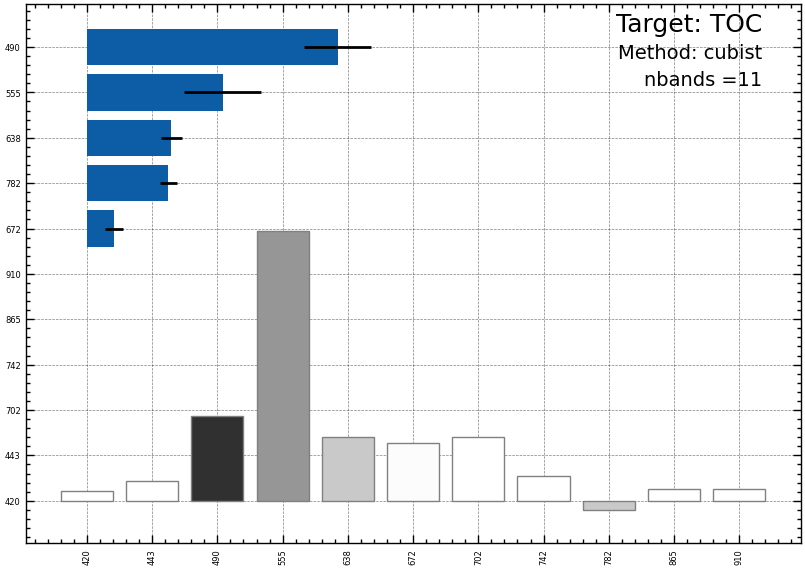

In [77]:
show_important_features_for ('TOC', model_details, feature_scores, 8, 50, 2)

###  SVR (TOC)

#### Leave one out

TOC -> [ r2 - **0.42**, Spec - log, n_bands - 11]   <br/><br/>
***Description***:To obtain the best model for TOC using svr method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to the 11 wavebands provided by Venus.


In [84]:
TOC_model_svr = SVR(C = 10 , kernel = 'rbf', gamma = 1 )
TOC_model_svr.fit(sampled_log11,  T[3])

SVR(C=10, gamma=1)

In [85]:
feature_scores['TOC'] = permutation_importance(TOC_model_svr, sampled_log11, T[3], n_repeats=20, random_state=0)
model_details['TOC'] = {'method': 'svr', 'spec': sampled_log11, 'spec_proc': 'log', 'n_bands': 11}

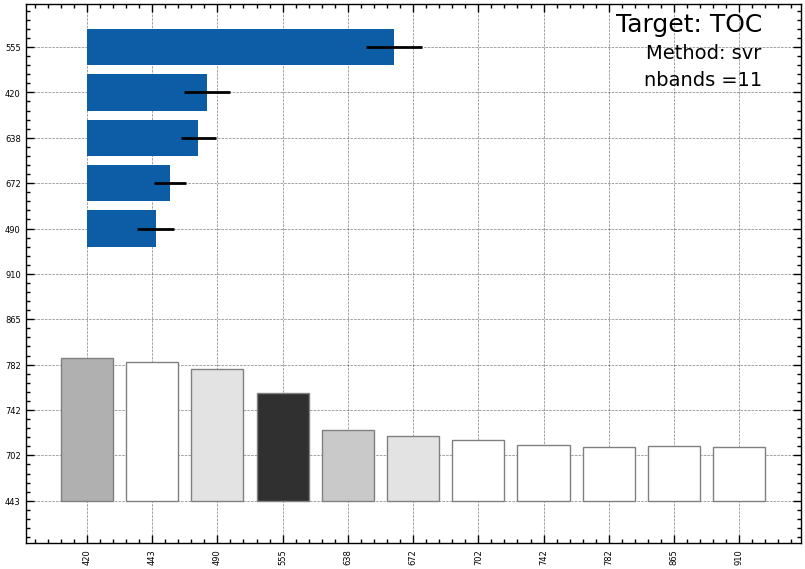

In [87]:
show_important_features_for ('TOC', model_details, feature_scores, 3,1, 2)

### Gradient Boosting Regression Tree (TOC)

#### Leave one out

TOC -> [ r2 - **0.41**, Spec - cr, n_bands - 11]   <br/><br/>
***Description***:To obtain the best model for TOC using gbrt method we trained the model on the continuum removal of the  smoothed spectra which is resampled to the 11 wavebands provided by Venus.


In [79]:
TOC_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 4, n_estimators = 30, random_state = 42)
TOC_model_gbrt.fit(sampled_cr11,  T[3])

GradientBoostingRegressor(max_depth=4, n_estimators=30, random_state=42)

In [80]:
feature_scores['TOC'] = permutation_importance(TOC_model_gbrt, sampled_cr11, T[3], n_repeats=20, random_state=0)
model_details['TOC'] = {'method': 'gbrt', 'spec': sampled_cr11, 'spec_proc': 'cr', 'n_bands': 11}

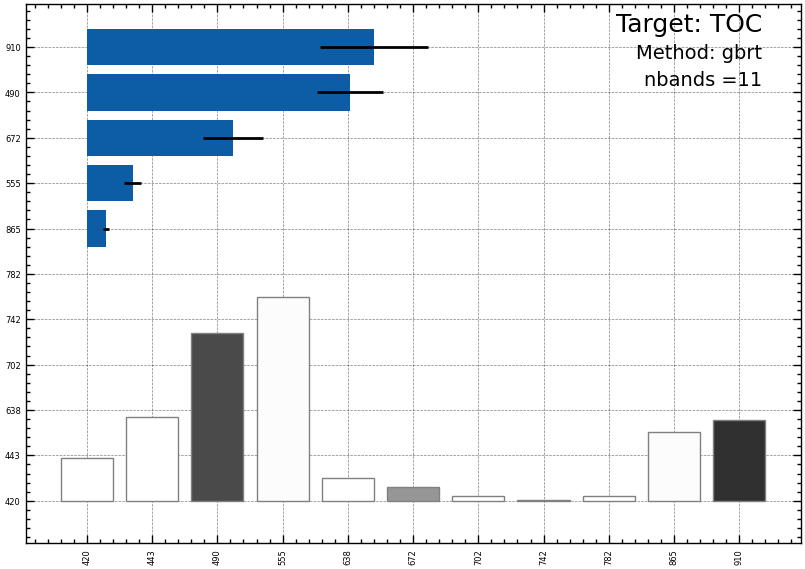

In [82]:
show_important_features_for ('TOC', model_details, feature_scores, 5, 70, 2)

## CaCO3

In [116]:
#HMtreeVen['plsr']['CaCO3']['none']['log']

### Multiple Linear Regression (CaCO3)

#### Leave one out

CaCO3 -> [ r2 - **0.53**, Spec - log, n_bands - 11]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using multiple linear regression method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to the 11 wavebands provided by Venus.

In [89]:
CaCO3_model_mult =LinearRegression(fit_intercept = 'True' )
CaCO3_model_mult.fit(sampled_log11,  T[4])

LinearRegression(fit_intercept='True')

In [90]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_mult, sampled_log11, T[4], n_repeats=10, random_state=0)
model_details['CaCO3'] = {'method': 'mult', 'spec': sampled_log11, 'spec_proc': 'log', 'n_bands': 11}

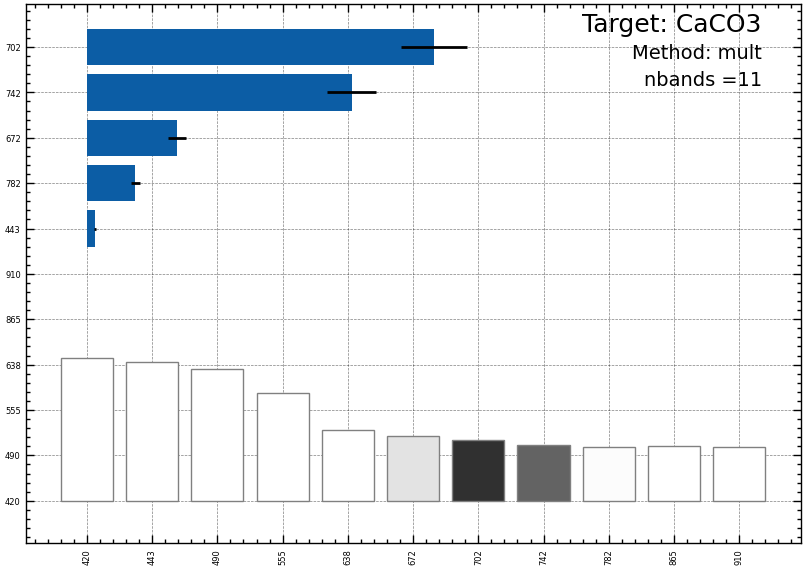

In [98]:
show_important_features_for ('CaCO3', model_details, feature_scores, 0.00004, 1, 2)

### PLSR (CaCO3)

#### Leave one out

CaCO3 -> [ r2 - **0.52**, Spec - log, n_bands - 11]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using PLSR method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to the 11 wavebands provided by Venus.


In [107]:
CaCO3_model_plsr = PLSRegression(n_components=3, scale=True)
CaCO3_model_plsr.fit(sampled_log11,  T[4])

PLSRegression(n_components=3)

In [109]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_plsr, sampled_log11, T[4], n_repeats=10, random_state=0)
model_details['CaCO3'] = {'method': 'plsr', 'spec': sampled_log11, 'spec_proc': 'log', 'n_bands': 11}

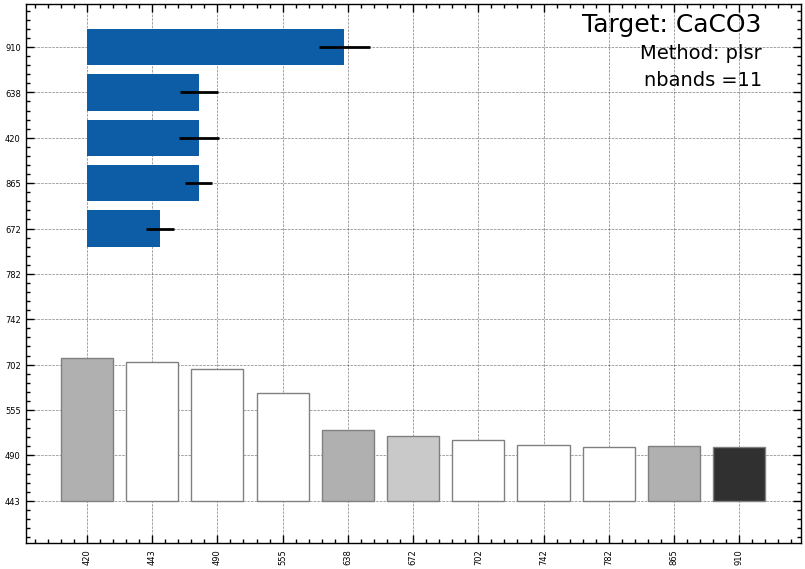

In [115]:
show_important_features_for ('CaCO3', model_details, feature_scores, 3, 1, 2)

### Cubist (CaCO3)

#### Leave one out

CaCO3 -> [ r2 - **0.51**, Spec - fod2, n_bands - 11]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using cubist method we trained the model on the first order derivative of the smoothed spectra which is resampled to the 11  wavebands provided by Venus.


In [100]:
CaCO3_model_cubist =Cubist(n_committees = 10, n_rules = 10)
CaCO3_model_cubist.fit(fod_sampled11,  T[4])

Cubist(n_committees=10, n_rules=10)

In [101]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_cubist, fod_sampled11, T[4], n_repeats=10, random_state=0)
model_details['CaCO3'] = {'method': 'cubist', 'spec': fod_sampled11, 'spec_proc': 'fod2', 'n_bands': 11}

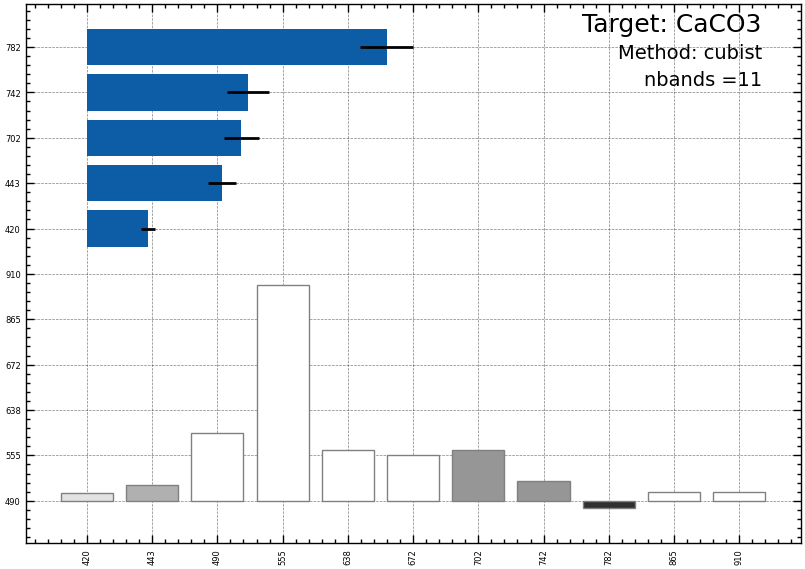

In [105]:
show_important_features_for ('CaCO3', model_details, feature_scores, 3, 40, 2)